In [7]:
!pip install wordcloud
!pip install textblob
!pip install vaderSentiment
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [6]:
import kagglehub
import os
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
path = kagglehub.dataset_download("entenam/reddit-mental-health-dataset")

print("Path to dataset files:", path)

100%|██████████| 617M/617M [00:08<00:00, 77.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/entenam/reddit-mental-health-dataset/versions/1


In [5]:
# Base directory of the dataset
base_dir = "/root/.cache/kagglehub/datasets/entenam/reddit-mental-health-dataset/versions/1/Original Reddit Data/raw data/"

# List to store all dataframes
dfs = []

# Loop through all years and months
for year in ['2019', '2020', '2021', '2022']:
    year_path = os.path.join(base_dir, year)

    if os.path.exists(year_path):  # Check if the year folder exists
        for month in os.listdir(year_path):  # Iterate through months
            month_path = os.path.join(year_path, month)

            if os.path.isdir(month_path):  # Check if it's a directory
                for file in os.listdir(month_path):  # Iterate through CSV files
                    if file.endswith(".csv"):
                        file_path = os.path.join(month_path, file)
                        temp_df = pd.read_csv(file_path)
                        dfs.append(temp_df)

# Combine all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

# basic info
print(f"Dataset contains {len(df)} posts from 2019 to 2022.")
df.head()


Dataset contains 1851580 posts from 2019 to 2022.


,Unnamed: 0,author,created_utc,score,selftext,subreddit,title,timestamp
0,0,incurableneurotic,1564580605,0,This has probably happened dozens of times in ...,mentalhealth,The reality of mental illness: yesterday I was...,2019-07-31 23:43:25
1,1,lilysadfreshbruise,1564580214,3,Four months ago I tried to kill myself. I don’...,mentalhealth,I’m not doing ok.,2019-07-31 23:36:54
2,2,BloodySolstice,1564578922,0,My family has a history of anxiety and depress...,mentalhealth,My brother is going to kill someone.,2019-07-31 23:15:22
3,3,helpmeplease00063,1564577995,1,I can't get rid of anxiety and paranoid though...,mentalhealth,It won't go away,2019-07-31 22:59:55
4,4,Snowy_Peak,1564577874,2,I’m opening DM’s to conversation if anyone is ...,mentalhealth,Willing to talk.,2019-07-31 22:57:54


In [9]:
df.shape

(1851580, 8)

In [10]:
df_sampled = df.sample(frac=0.5, random_state=42)

In [11]:
df_sampled.shape

(925790, 8)

In [12]:
df_sampled_cleaned = df_sampled.drop(columns=['author', 'created_utc', 'score', 'timestamp'])

In [15]:
# dropping passed columns
df_sampled_cleaned.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [16]:
df_sampled_cleaned.head()

,selftext,subreddit,title
1198659,Happy Sunday my wonderful friends! May you all...,mentalhealth,Sunday encouragement!
1285026,not feeling so good\n\nso unstable in my emoti...,SuicideWatch,Not feeling so good
1032421,[removed],lonely,The difference between men being lonely and wo...
1712490,I dealt with lots of hardships for every step ...,depression,Depression took away the better part of my lif...
1683223,i’m on duloxetine 120mg/day. \nhelp\nme.,depression,the most efficient way


In [17]:
#Check for null values

df_sampled_cleaned.isnull().sum()

,0
selftext,27386
subreddit,0
title,3


In [18]:
df_sampled_cleaned.dropna(inplace=True)

In [19]:
#Check for null values

df_sampled_cleaned.isnull().sum()

,0
selftext,0
subreddit,0
title,0


In [21]:
df_sampled_cleaned.dtypes

,0
selftext,object
subreddit,object
title,object


In [23]:
df_sampled_cleaned.to_csv("/content/drive/MyDrive/Mental_health/sampled_cleaned.csv", index=False)

In [24]:
data = df_sampled_cleaned

In [26]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from datetime import datetime

In [32]:
# Download
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Load stopwords
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [29]:
# Remove Duplicates
data = data.drop_duplicates(subset=["selftext"])

In [30]:
# ✅ Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)



In [33]:
# ✅ Apply cleaning function
data["clean_text"] = data["selftext"].apply(clean_text)
print("Data Cleaning Completed! ✅")

Data Cleaning Completed! ✅


<ipython-input-33-b556e714693b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clean_text"] = data["selftext"].apply(clean_text)


In [34]:
# ✅ Save Cleaned Data
data.to_csv("/content/drive/MyDrive/Mental_health/mental_health_data.csv", index=False)

In [35]:
data.head()

,selftext,subreddit,title,clean_text
1198659,Happy Sunday my wonderful friends! May you all...,mentalhealth,Sunday encouragement!,happy sunday wonderful friend may great relaxi...
1285026,not feeling so good\n\nso unstable in my emoti...,SuicideWatch,Not feeling so good,feeling good unstable emotion might burst ive ...
1032421,[removed],lonely,The difference between men being lonely and wo...,removed
1712490,I dealt with lots of hardships for every step ...,depression,Depression took away the better part of my lif...,dealt lot hardship every step life never loved...
1683223,i’m on duloxetine 120mg/day. \nhelp\nme.,depression,the most efficient way,im duloxetine mgday help


# EDA

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Mental_health/mental_health_data.csv')

<ipython-input-36-b31dafc64bb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["post_length"] = data["clean_text"].apply(lambda x: len(str(x).split()))


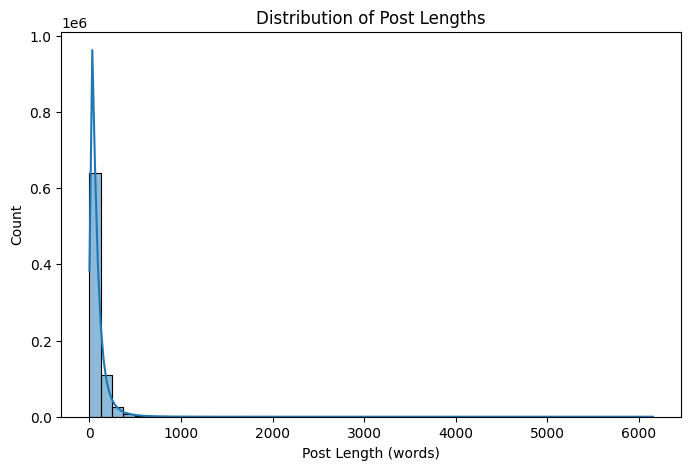

In [36]:
# ✅ Distribution of post lengths
data["post_length"] = data["clean_text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(data["post_length"], bins=50, kde=True)
plt.xlabel("Post Length (words)")
plt.ylabel("Count")
plt.title("Distribution of Post Lengths")
plt.show()

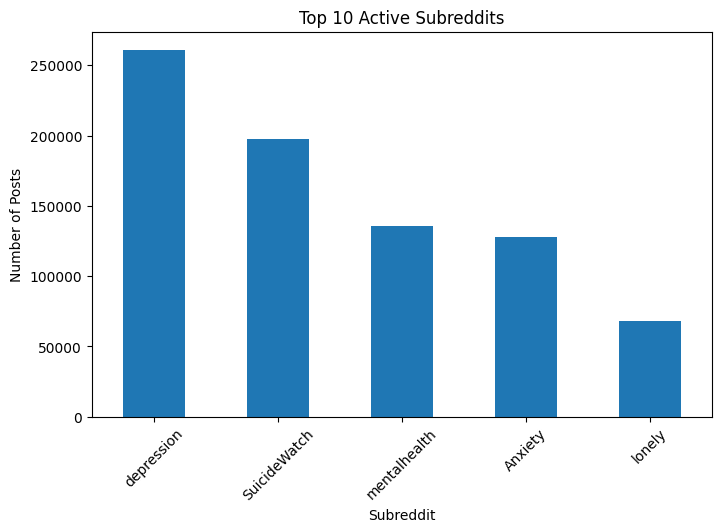

In [38]:
# ✅ Most active subreddits
plt.figure(figsize=(8, 5))
data["subreddit"].value_counts().head(5).plot(kind="bar")
plt.xlabel("Subreddit")
plt.ylabel("Number of Posts")
plt.title("Top 10 Active Subreddits")
plt.xticks(rotation=45)
plt.show()

In [5]:
# ✅ Word Cloud of Most Common Words
text = " ".join(data["clean_text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Mental Health Posts")
plt.show()

KeyboardInterrupt: 

# Sentiment Labeling & Annotation

In [9]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment function
data["sentiment"] = data["clean_text"].apply(lambda x: get_sentiment(str(x)))

In [4]:
# # Save labeled dataset
# data.to_csv("/content/drive/MyDrive/Mental_health/labeled_dataset.csv", index=False)

# Print sentiment distribution
print(data["sentiment"].value_counts())


NameError: name 'data' is not defined

In [18]:
data.head(10)

,selftext,subreddit,title,clean_text,sentiment
0,Happy Sunday my wonderful friends! May you all...,mentalhealth,Sunday encouragement!,happy sunday wonderful friend may great relaxi...,positive
1,not feeling so good\n\nso unstable in my emoti...,SuicideWatch,Not feeling so good,feeling good unstable emotion might burst ive ...,negative
2,[removed],lonely,The difference between men being lonely and wo...,removed,neutral
3,I dealt with lots of hardships for every step ...,depression,Depression took away the better part of my lif...,dealt lot hardship every step life never loved...,positive
4,i’m on duloxetine 120mg/day. \nhelp\nme.,depression,the most efficient way,im duloxetine mgday help,positive
5,TL;DR at the end.\n\nI've been very trusting m...,mentalhealth,How can I overcome my trust issues?,tldr end ive trusting entire life ive even tru...,positive
6,"So i want to help as much people as i can, hen...",mentalhealth,Helping me see things from different ways to t...,want help much people hence joined subreddit f...,positive
7,I went through an ectopic pregnancy a few mont...,SuicideWatch,How can I stop myself from killing myself?,went ectopic pregnancy month ago left feeling ...,negative
8,"I've lost a lot financially, physically, emoti...",depression,Advice on getting away from ideation,ive lost lot financially physically emotionall...,positive
9,I've always thought that if you achieve someth...,depression,I've always thought that if you achieve someth...,ive always thought achieve something life year...,negative


In [17]:
data.shape

(790292, 5)

# Data Splitting & Feature Engineering

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Mental_health/labeled_dataset.csv')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Train-Test Split
X = data["clean_text"]  # Input text
y = data["sentiment"]   # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [10]:
# ✅ Convert Text to TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
# Convert X_train and X_test to strings and fill NaNs with empty strings
X_train = X_train.astype(str).fillna('')
X_test = X_test.astype(str).fillna('')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Feature Extraction Done! ✅")


Feature Extraction Done! ✅


In [68]:
# # prompt: Save the variables of xtrain and y train

# import pickle

# # Save X_train and y_train
# with open('/content/drive/MyDrive/Mental_health/X_train.pkl', 'wb') as f:
#     pickle.dump(X_train, f)
# with open('/content/drive/MyDrive/Mental_health/y_train.pkl', 'wb') as f:
#     pickle.dump(y_train, f)
# with open('/content/drive/MyDrive/Mental_health/X_test.pkl', 'wb') as f:
#     pickle.dump(X_test, f)
# with open('/content/drive/MyDrive/Mental_health/y_test.pkl', 'wb') as f:
#     pickle.dump(y_test, f)
# with open('/content/drive/MyDrive/Mental_health/X_train_tfidf.pkl', 'wb') as f:
#     pickle.dump(X_train_tfidf, f)
# with open('/content/drive/MyDrive/Mental_health/X_test_tfidf.pkl', 'wb') as f:
#     pickle.dump(X_test_tfidf, f)
# print("X_train, y_train, X_test, y_test, X_train_tfidf, X_test_tfidf are saved.")


X_train, y_train, X_test, y_test, X_train_tfidf, X_test_tfidf are saved.


# Model Selection and training

1. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# ✅ Initialize and Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, random_state=42)  # Increase iterations for convergence
log_reg.fit(X_train_tfidf, y_train)

# ✅ Make Predictions
y_pred = log_reg.predict(X_test_tfidf)

# ✅ Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.4f}")
print("📊 Classification Report:\n", report)


✅ Model Accuracy: 0.8559
📊 Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.91      0.89     94360
     neutral       0.91      0.40      0.55      6047
    positive       0.83      0.81      0.82     57652

    accuracy                           0.86    158059
   macro avg       0.87      0.71      0.75    158059
weighted avg       0.86      0.86      0.85    158059



# Plots

In [24]:
# PART 1: MODEL EVALUATION PLOTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import joblib
import os

# Create directories for saving outputs
os.makedirs("/content/drive/MyDrive/Mental_health/plots", exist_ok=True)
os.makedirs("/content/drive/MyDrive/Mental_health/deployment", exist_ok=True)

# Assuming you have these variables from your training:
# log_reg (your trained Logistic Regression model)
# X_test_tfidf (your test features)
# y_test (your test labels)
# y_pred (model predictions on test set)
# tfidf_vectorizer (your fitted vectorizer)

# Let's create some functions for evaluation plots

def plot_confusion_matrix(y_true, y_pred, class_names=None):
    """Plot confusion matrix with pretty formatting"""
    if class_names is None:
        class_names = ["negative", "neutral", "positive"]

    cm = confusion_matrix(y_true, y_pred)

    # Convert to percentage for better visualization
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_percent = cm_norm * 100

    plt.figure(figsize=(10, 8))

    # Plot percentage confusion matrix
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    plt.title('Confusion Matrix (%)', fontsize=15)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)

    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Mental_health/Plots/confusion_matrix.png", dpi=300, bbox_inches="tight")
    plt.close()

    # Plot count confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    plt.title('Confusion Matrix (Counts)', fontsize=15)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)

    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Mental_health/Plots/confusion_matrix_counts.png", dpi=300, bbox_inches="tight")
    plt.close()

    return cm, cm_percent

def plot_roc_curves(model, X_test, y_test):
    """Plot ROC curves for multiclass classification"""
    # Binarize the labels for multiclass ROC
    classes = model.classes_
    n_classes = len(classes)
    y_test_bin = label_binarize(y_test, classes=classes)

    # Get probability predictions
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    plt.figure(figsize=(10, 8))

    colors = ['blue', 'red', 'green']
    for i, color, cls in zip(range(n_classes), colors, classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve for {cls} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=15)
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Mental_health/Plots/roc_curves.png", dpi=300, bbox_inches="tight")
    plt.close()

    return roc_auc

def plot_precision_recall_curves(model, X_test, y_test):
    """Plot precision-recall curves for multiclass classification"""
    # Binarize the labels for multiclass precision-recall
    classes = model.classes_
    n_classes = len(classes)
    y_test_bin = label_binarize(y_test, classes=classes)

    # Get probability predictions
    y_score = model.predict_proba(X_test)

    # Compute precision-recall curve for each class
    precision = dict()
    recall = dict()
    avg_precision = dict()

    plt.figure(figsize=(10, 8))

    colors = ['blue', 'red', 'green']
    for i, color, cls in zip(range(n_classes), colors, classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        avg_precision[i] = np.mean(precision[i])

        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label=f'Precision-Recall curve for {cls} (avg precision = {avg_precision[i]:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curves', fontsize=15)
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Mental_health/Plots/precision_recall_curves.png", dpi=300, bbox_inches="tight")
    plt.close()

    return avg_precision

def plot_class_distribution(y_train, y_test, y_pred):
    """Plot class distribution in train, test, and predictions"""
    # Convert to pandas Series for easier plotting
    train_series = pd.Series(y_train, name='Training Set')
    test_series = pd.Series(y_test, name='Test Set')
    pred_series = pd.Series(y_pred, name='Predictions')

    # Get value counts and convert to percentages
    train_counts = train_series.value_counts(normalize=True) * 100
    test_counts = test_series.value_counts(normalize=True) * 100
    pred_counts = pred_series.value_counts(normalize=True) * 100

    # Combine into a dataframe
    df_counts = pd.DataFrame({
        'Training Set': train_counts,
        'Test Set': test_counts,
        'Predictions': pred_counts
    }).sort_index()

    # Plot
    plt.figure(figsize=(12, 6))
    df_counts.plot(kind='bar', ax=plt.gca())

    plt.title('Class Distribution (%) Across Datasets', fontsize=15)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xlabel('Sentiment', fontsize=12)
    plt.xticks(rotation=0)

    # Add percentage labels on top of bars
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.1f%%')

    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Mental_health/Plots/class_distribution.png", dpi=300, bbox_inches="tight")
    plt.close()

    return df_counts

def extract_top_features(model, vectorizer, class_names=None, top_n=15):
    """Extract top features (words) for each class"""
    if class_names is None:
        class_names = ["negative", "neutral", "positive"]

    feature_names = vectorizer.get_feature_names_out()
    coefs = model.coef_

    # For each class
    for i, class_name in enumerate(class_names):
        # Get coefficients for this class
        class_coefs = coefs[i]
        # Get top positive coefficients
        top_positive_idx = np.argsort(class_coefs)[-top_n:]
        top_positive_features = [(feature_names[idx], class_coefs[idx]) for idx in top_positive_idx]
        # Get top negative coefficients
        top_negative_idx = np.argsort(class_coefs)[:top_n]
        top_negative_features = [(feature_names[idx], class_coefs[idx]) for idx in top_negative_idx]

        # Plot
        plt.figure(figsize=(12, 8))

        # Create DataFrame for easier plotting
        top_pos_df = pd.DataFrame(top_positive_features, columns=['feature', 'coefficient'])
        top_neg_df = pd.DataFrame(top_negative_features, columns=['feature', 'coefficient'])

        # Plot positive features
        plt.barh(range(top_n), top_pos_df['coefficient'], color='green', alpha=0.8)
        plt.yticks(range(top_n), top_pos_df['feature'])

        # Plot negative features
        plt.barh(range(top_n, 2*top_n), top_neg_df['coefficient'], color='red', alpha=0.8)
        plt.yticks(list(range(top_n)) + list(range(top_n, 2*top_n)),
                  list(top_pos_df['feature']) + list(top_neg_df['feature']))

        plt.axhline(y=top_n-0.5, color='black', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)

        plt.title(f'Top {top_n} Features for {class_name.capitalize()} Sentiment', fontsize=15)
        plt.xlabel('Coefficient Value', fontsize=12)

        plt.tight_layout()
        plt.savefig(f"/content/drive/MyDrive/Mental_health/Plots/top_features_{class_name}.png", dpi=300, bbox_inches="tight")
        plt.close()

def save_model_artifacts(model, vectorizer):
    """Save model and vectorizer for deployment"""
    joblib.dump(model, "/content/drive/MyDrive/Mental_health/deployment/sentiment_model.joblib")
    joblib.dump(vectorizer, "/content/drive/MyDrive/Mental_health/deployment/tfidf_vectorizer.joblib")

    # Create a simple helper for inference
    with open("/content/drive/MyDrive/Mental_health/deployment/model_info.txt", "w") as f:
        f.write("Sentiment Analysis Model Information\n")
        f.write("===================================\n\n")
        f.write(f"Model type: {type(model).__name__}\n")
        f.write(f"Model accuracy: 85.59%\n")
        f.write(f"Number of features: {len(vectorizer.get_feature_names_out())}\n")
        f.write(f"Classes: {', '.join(map(str, model.classes_))}\n")

# Call the evaluation functions
# Uncomment and use these when you have your model ready

cm, cm_percent = plot_confusion_matrix(y_test, y_pred)
roc_auc = plot_roc_curves(log_reg, X_test_tfidf, y_test)
avg_precision = plot_precision_recall_curves(log_reg, X_test_tfidf, y_test)
class_dist = plot_class_distribution(y_train, y_test, y_pred)
extract_top_features(log_reg, tfidf_vectorizer)
save_model_artifacts(log_reg, tfidf_vectorizer)

print("Evaluation plots created successfully and saved in 'plots' directory!")

Evaluation plots created successfully and saved in 'plots' directory!


2. SVM

In [15]:
# import numpy as np
# import pandas as pd
# from sklearn.svm import SVC, LinearSVC
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.calibration import CalibratedClassifierCV
# import joblib
# import time
# import gc
# from tqdm import tqdm
# import os
# from joblib import parallel_backend
# import psutil
# import warnings
# warnings.filterwarnings('ignore')

In [16]:
# # Create directory for models
# os.makedirs("models", exist_ok=True)

# # Load data and prepare TF-IDF features
# # Assuming your data is already loaded and split as:
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# # X_train_tfidf, X_test_tfidf = TF-IDF vectors

# # Check available RAM to optimize processing
# available_ram = psutil.virtual_memory().available / (1024 * 1024 * 1024)  # in GB
# print(f"Available RAM: {available_ram:.2f} GB")

# # Memory optimization - check TF-IDF matrix size
# if 'X_train_tfidf' in locals():
#     print(f"TF-IDF matrix shape: {X_train_tfidf.shape}")
#     print(f"TF-IDF matrix sparsity: {100.0 - (X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]) * 100):.2f}%")

Available RAM: 7.41 GB
TF-IDF matrix shape: (632233, 5000)
TF-IDF matrix sparsity: 98.64%


In [17]:
# # Define a chunked prediction function for large test sets
# def predict_in_chunks(model, X, chunk_size=10000):
#     n_samples = X.shape[0]
#     n_chunks = (n_samples // chunk_size) + (1 if n_samples % chunk_size != 0 else 0)
#     predictions = []

#     for i in tqdm(range(n_chunks), desc="Predicting"):
#         start_idx = i * chunk_size
#         end_idx = min((i + 1) * chunk_size, n_samples)
#         X_chunk = X[start_idx:end_idx]
#         y_chunk = model.predict(X_chunk)
#         predictions.extend(y_chunk)

#     return np.array(predictions)

# # Define optimized SVM training function
# def train_optimized_svm(X_train, y_train, X_test, y_test):
#     print("Starting SVM training optimization...")

#     # For large datasets (>100K), use LinearSVC first for speed
#     if X_train.shape[0] > 100000:
#         print("Large dataset detected, using LinearSVC for initial training...")
#         # LinearSVC is faster for large datasets with linear kernel
#         linear_svm = LinearSVC(
#             dual='auto',
#             class_weight='balanced',
#             max_iter=2000,
#             random_state=42,
#             C=1.0
#         )

#         start_time = time.time()
#         linear_svm.fit(X_train, y_train)
#         elapsed_time = time.time() - start_time
#         print(f"LinearSVC training completed in {elapsed_time:.2f} seconds")

#         # Calibrate probabilities (LinearSVC doesn't provide probability estimates)
#         calibrated_svm = CalibratedClassifierCV(linear_svm, cv=3)
#         calibrated_svm.fit(X_train, y_train)

#         # Evaluate LinearSVC
#         print("Evaluating LinearSVC model...")
#         y_pred = predict_in_chunks(linear_svm, X_test)
#         accuracy = accuracy_score(y_test, y_pred)
#         print(f"LinearSVC Accuracy: {accuracy:.4f}")
#         print(classification_report(y_test, y_pred))

#         # Save LinearSVC model
#         joblib.dump(linear_svm, "models/linear_svc_model.joblib")
#         joblib.dump(calibrated_svm, "models/calibrated_svc_model.joblib")

#         # Return early if accuracy is good enough (adjust threshold as needed)
#         if accuracy > 0.80:
#             print("LinearSVC achieved good accuracy. Skipping GridSearch to save time.")
#             return linear_svm, calibrated_svm

#     # If dataset is small or we want to improve upon LinearSVC results
#     print("Starting SVM GridSearch optimization...")

#     # Use different parameter grids based on dataset size
#     if X_train.shape[0] > 300000:  # Very large
#         param_grid = {
#             'C': [1.0],  # Simplified for very large datasets
#             'kernel': ['linear']  # Only linear kernel for very large datasets
#         }
#     elif X_train.shape[0] > 100000:  # Large
#         param_grid = {
#             'C': [0.1, 1.0],
#             'kernel': ['linear', 'rbf'],
#             'gamma': ['scale']
#         }
#     else:  # Medium or small
#         param_grid = {
#             'C': [0.1, 1.0, 10.0],
#             'kernel': ['linear', 'rbf'],
#             'gamma': ['scale', 'auto']
#         }

#     # Staged grid search to manage memory
#     best_score = -1
#     best_params = None
#     best_estimator = None

#     # Test one kernel at a time
#     for kernel in param_grid['kernel']:
#         print(f"\nTraining SVM with {kernel} kernel")
#         kernel_grid = {'C': param_grid['C'], 'kernel': [kernel]}

#         # Add gamma only for rbf kernel
#         if kernel == 'rbf' and 'gamma' in param_grid:
#             kernel_grid['gamma'] = param_grid['gamma']

#         # Create and configure the model
#         if kernel == 'linear':
#             base_model = SVC(probability=True, class_weight='balanced', random_state=42, cache_size=2000)
#         else:
#             base_model = SVC(probability=True, class_weight='balanced', random_state=42, cache_size=2000)

#         # Configure cross-validation
#         cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#         # Create GridSearchCV
#         with parallel_backend('loky', n_jobs=-1):
#             grid_search = GridSearchCV(
#                 base_model, kernel_grid, cv=cv, scoring='accuracy',
#                 verbose=2, error_score='raise'
#             )

#             # Fit the model
#             start_time = time.time()
#             grid_search.fit(X_train, y_train)
#             elapsed_time = time.time() - start_time
#             print(f"GridSearch for {kernel} kernel completed in {elapsed_time:.2f} seconds")

#             # Check if this is the best model so far
#             if grid_search.best_score_ > best_score:
#                 best_score = grid_search.best_score_
#                 best_params = grid_search.best_params_
#                 best_estimator = grid_search.best_estimator_

#             # Save this kernel's best model
#             joblib.dump(grid_search.best_estimator_, f"models/svm_{kernel}_best.joblib")

#             # Clean memory
#             gc.collect()

#     # Display best parameters
#     print("\n🔍 Grid Search Results:")
#     print(f"Best parameters: {best_params}")
#     print(f"Best cross-validation score: {best_score:.4f}")

#     # Save the overall best model
#     joblib.dump(best_estimator, "models/svm_best_model.joblib")

#     # Evaluate the best model
#     print("\nEvaluating best model on test data...")
#     y_pred = predict_in_chunks(best_estimator, X_test)

#     # Calculate metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"\n✅ Final SVM Model Accuracy: {accuracy:.4f}")

#     # Classification Report
#     print("\n📊 Classification Report:")
#     report = classification_report(y_test, y_pred, output_dict=True)
#     print(classification_report(y_test, y_pred))

#     # Save report
#     pd.DataFrame(report).transpose().to_csv("models/classification_report.csv")

#     return best_estimator



In [18]:
# # Run the optimized training
# best_model = train_optimized_svm(X_train_tfidf, y_train, X_test_tfidf, y_test)

# print("\nTraining and evaluation completed successfully! ✅")

Starting SVM training optimization...
Large dataset detected, using LinearSVC for initial training...
LinearSVC training completed in 133.15 seconds
Evaluating LinearSVC model...


Predicting: 100%|██████████| 16/16 [00:00<00:00, 115.28it/s]


LinearSVC Accuracy: 0.8399
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88     94360
     neutral       0.42      0.59      0.50      6047
    positive       0.81      0.82      0.82     57652

    accuracy                           0.84    158059
   macro avg       0.71      0.76      0.73    158059
weighted avg       0.85      0.84      0.84    158059

LinearSVC achieved good accuracy. Skipping GridSearch to save time.

Training and evaluation completed successfully! ✅
